# Équation Différentielles et Interactions Écologiques

In [1]:
# Commençons par importer les outils dont nous aurons besoin. 
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate 
%matplotlib inline

# Une histoire de compétition.   

Soit deux espèces en compétition: deux espèces de poissons dans un lac, deux espèces de bactéries dans un intestin humain, deux graminées dans une prairie. Quelles sont les conditions sous lesquelles l'une pousse l'autre à l'extinction ? 

*Exercice: Modéliser ce système*

Il existe toute une classe de modèles permettant de rendre compte de l'évolution d'un certain nombre de grandeurs dans le temps et qui sont assez simple à écrire et à simuler: les systèmes d'équations diffèrentielles du premier ordre. 

 - Ces modèles sont **déterministes**. Ils font partie de la famille des [systèmes dynamiques](https://fr.wikipedia.org/wiki/Syst%C3%A8me_dynamique) 
 - Ces modèles sont en **temps continu**, les trajectoires sont définies sur un-sous ensemble de $\mathbb R$.
 - Ces modèles sont **non spatialisés**, on parle (peut être abusivement) de **modèle de champ moyen** (mean field models). L'espace d'état est de la forme $\mathbb R^N$, les grandeurs ne sont pas entières parceque l'on regarde la densité moyennes (en individus par unité de volume).
 - Ils peuvent être **autonomes** ou non. Nous allons commencer par un système autonome.

## Construction du modèle 

On commence par une seule espéce. On fait un bilan démographique sur une durée de controle $\Delta_t$

\begin{align}
\text{Variation de la population sur } \Delta_t &= + \text{Individus ajoutés à la population durant } 
\Delta_t -  \text{Individus retirés de la population durant } \Delta_t \\
&= \text{naissances} - \text{décès} + \text{immigration} - \text{émigration}
\end{align}

- *Hypothèse H1*: On considère un modèle de champ moyen. L'espace d'état est $\mathbb R$. 
- *Hypothèse H2*: Il n'y a pas de mouvement migratoires.
- *Hypothèse H3*: Les taux de naissance per capita $b$ et de taux de mort per capita $m$ sont constants. 

On écrit le système dynamique suivant: 

$$(S1) : \frac{dN}{dt} = bN - mN$$

Que l'on peut réécrire avec $r:=b-m$:

$$(S1) : \frac{dN}{dt} = rN $$

- La **variables d'état** de ce modèle est la densité d'individus $N \in \mathbb R$

- La **trajectoire** du système est la suite $(N_t)_{t\in \mathbb R}$ qui désigne la densité d'individus aux temps $t$. 

- Le **paramètre** de ce modèle est le taux d'accroissement $r$.

Dans le cas d'un modèle ODE du premier ordre autonome, on dispose de plusieurs outils pour représenter le comportement du modèle. Ils sont de plus en plus synthétiques (mais aussi de plus en plus couteux à établir). Dans l'ordre:

![](dynamical_systems.svg)

- Le tracé d'une **trajectoire** donne l'état du système au cours du temps pour *certaines* valeurs de paramètres et *certaines* conditions initiales. Pour le tracer il suffit d'intégrer l'ODE. 
- Le tracé du **diagramme de phase** donne le comportement qualitatif du système pour *certaines* valeurs de paramètres, mais **toutes** conditions initiales. Pour le tracer, il faut chercher les isoclines zéro et les points d'équilibre.
- Le tracé du **diagramme de bifurcation** donne la position et la nature des équilibre du système pour (potentiellement) **toutes** valeurs de paramètres, et **toutes** conditions initiales.

# Intégration numérique

Soit le système dynamique $(S)$ et une condition initiale $(N_0,P_0)$ définissant un *Problème de Cauchy*. Résoudre numériquement ce problème revient à calculer la trajectoire $(N_t,P_t)_{t\in t_0...t_f}$. 

### Résoudre numériquement une Équation différentielle ordinaire. 

Soit le problème de Cauchy suivant: 
\begin{align}
\begin{cases}
\mathbf{y}'(t) = f(\mathbf{y}(t))\\ 
\mathbf{ y }(0)= \mathbf{ y_0}\\ 
\end{cases}
\end{align}

On cherche à tracer la trajectoire, c.à.d la courbe $\left(t,\mathbf{y}(t)\right)_{t\in[0,T]}$. (Encore une fois je vous renvoie à votre cours de math pour les définitions rigoureuses de problème de Cauchy et de solution d'un problème de Cauchy). 


Si on connait la valeur de $\mathbf{y}$ au temps $t$ et que l'on veut connaitre sa valeur au temps $t+\Delta_t$:
\begin{align}
\int_t^{t+\Delta_t} \mathbf{y}'(s)ds &= \int_t^{t+\Delta_t} f(\mathbf{y}(s))ds\\ 
\mathbf{y}(t+\Delta_t) - \mathbf{y}(t)  &= \int_t^{t+\Delta_t} f(\mathbf{y}(s)ds)\\
\mathbf{y}(t+\Delta_t) &= \mathbf{y}(t) + \int_t^{t+\Delta_t} f(\mathbf{y}(s)ds)
\end{align}

Il nous faut intégrer $f$ entre $y(t)$ et $y(t+\Delta_t)$. 

La méthode des rectangles est un classique pour intégrer numériquement une fonction:

![Méthode des rectangles](data:image/svg+xml,%3Csvg%0A%20%20%20xmlns%3Adc%3D%22http%3A//purl.org/dc/elements/1.1/%22%0A%20%20%20xmlns%3Acc%3D%22http%3A//creativecommons.org/ns%23%22%0A%20%20%20xmlns%3Ardf%3D%22http%3A//www.w3.org/1999/02/22-rdf-syntax-ns%23%22%0A%20%20%20xmlns%3Asvg%3D%22http%3A//www.w3.org/2000/svg%22%0A%20%20%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%0A%20%20%20xmlns%3Asodipodi%3D%22http%3A//sodipodi.sourceforge.net/DTD/sodipodi-0.dtd%22%0A%20%20%20xmlns%3Ainkscape%3D%22http%3A//www.inkscape.org/namespaces/inkscape%22%0A%20%20%20width%3D%2294.664589mm%22%0A%20%20%20height%3D%22106.77828mm%22%0A%20%20%20viewBox%3D%220%200%2094.664589%20106.77828%22%0A%20%20%20version%3D%221.1%22%0A%20%20%20id%3D%22svg8%22%0A%20%20%20inkscape%3Aversion%3D%220.92.0%20r15299%22%0A%20%20%20sodipodi%3Adocname%3D%22rectangle.svg%22%3E%0A%20%20%3Cdefs%0A%20%20%20%20%20id%3D%22defs2%22%3E%0A%20%20%20%20%3Cmarker%0A%20%20%20%20%20%20%20inkscape%3Astockid%3D%22StopL%22%0A%20%20%20%20%20%20%20orient%3D%22auto%22%0A%20%20%20%20%20%20%20refY%3D%220%22%0A%20%20%20%20%20%20%20refX%3D%220%22%0A%20%20%20%20%20%20%20id%3D%22StopL%22%0A%20%20%20%20%20%20%20style%3D%22overflow%3Avisible%22%0A%20%20%20%20%20%20%20inkscape%3Aisstock%3D%22true%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20id%3D%22path4712%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%200%2C5.65%20V%20-5.65%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-opacity%3A0.75%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A1.00000003pt%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20transform%3D%22scale%280.8%29%22%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%20/%3E%0A%20%20%20%20%3C/marker%3E%0A%20%20%3C/defs%3E%0A%20%20%3Csodipodi%3Anamedview%0A%20%20%20%20%20id%3D%22base%22%0A%20%20%20%20%20pagecolor%3D%22%23ffffff%22%0A%20%20%20%20%20bordercolor%3D%22%23666666%22%0A%20%20%20%20%20borderopacity%3D%221.0%22%0A%20%20%20%20%20inkscape%3Apageopacity%3D%220.0%22%0A%20%20%20%20%20inkscape%3Apageshadow%3D%222%22%0A%20%20%20%20%20inkscape%3Azoom%3D%222.8%22%0A%20%20%20%20%20inkscape%3Acx%3D%22149.91214%22%0A%20%20%20%20%20inkscape%3Acy%3D%22133.95329%22%0A%20%20%20%20%20inkscape%3Adocument-units%3D%22mm%22%0A%20%20%20%20%20inkscape%3Acurrent-layer%3D%22layer1%22%0A%20%20%20%20%20showgrid%3D%22false%22%0A%20%20%20%20%20inkscape%3Awindow-width%3D%221366%22%0A%20%20%20%20%20inkscape%3Awindow-height%3D%22752%22%0A%20%20%20%20%20inkscape%3Awindow-x%3D%220%22%0A%20%20%20%20%20inkscape%3Awindow-y%3D%2216%22%0A%20%20%20%20%20inkscape%3Awindow-maximized%3D%221%22%0A%20%20%20%20%20fit-margin-top%3D%220%22%0A%20%20%20%20%20fit-margin-left%3D%220%22%0A%20%20%20%20%20fit-margin-right%3D%220%22%0A%20%20%20%20%20fit-margin-bottom%3D%220%22%0A%20%20%20%20%20showborder%3D%22true%22%20/%3E%0A%20%20%3Cmetadata%0A%20%20%20%20%20id%3D%22metadata5%22%3E%0A%20%20%20%20%3Crdf%3ARDF%3E%0A%20%20%20%20%20%20%3Ccc%3AWork%0A%20%20%20%20%20%20%20%20%20rdf%3Aabout%3D%22%22%3E%0A%20%20%20%20%20%20%20%20%3Cdc%3Aformat%3Eimage/svg%2Bxml%3C/dc%3Aformat%3E%0A%20%20%20%20%20%20%20%20%3Cdc%3Atype%0A%20%20%20%20%20%20%20%20%20%20%20rdf%3Aresource%3D%22http%3A//purl.org/dc/dcmitype/StillImage%22%20/%3E%0A%20%20%20%20%20%20%20%20%3Cdc%3Atitle%20/%3E%0A%20%20%20%20%20%20%3C/cc%3AWork%3E%0A%20%20%20%20%3C/rdf%3ARDF%3E%0A%20%20%3C/metadata%3E%0A%20%20%3Cg%0A%20%20%20%20%20inkscape%3Alabel%3D%22Layer%201%22%0A%20%20%20%20%20inkscape%3Agroupmode%3D%22layer%22%0A%20%20%20%20%20id%3D%22layer1%22%0A%20%20%20%20%20transform%3D%22translate%28-10.07026%2C-4.0684521%29%22%3E%0A%20%20%20%20%3Crect%0A%20%20%20%20%20%20%20style%3D%22opacity%3A0.75%3Bfill%3A%2300ff00%3Bfill-opacity%3A0.96078431%3Bstroke%3A%23008000%3Bstroke-width%3A0.71305209%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20id%3D%22rect4539-2-9%22%0A%20%20%20%20%20%20%20width%3D%2246.113094%22%0A%20%20%20%20%20%20%20height%3D%220.37797162%22%0A%20%20%20%20%20%20%20x%3D%2225.702381%22%0A%20%20%20%20%20%20%20y%3D%2298.562492%22%20/%3E%0A%20%20%20%20%3Crect%0A%20%20%20%20%20%20%20style%3D%22opacity%3A0.4510002%3Bfill%3A%2300ff00%3Bfill-opacity%3A0.96078431%3Bstroke%3A%23008000%3Bstroke-width%3A0.71305209%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20id%3D%22rect4539-2%22%0A%20%20%20%20%20%20%20width%3D%2246.113094%22%0A%20%20%20%20%20%20%20height%3D%2234.206844%22%0A%20%20%20%20%20%20%20x%3D%2225.702379%22%0A%20%20%20%20%20%20%20y%3D%2218.242558%22%20/%3E%0A%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20d%3D%22M%2025.702381%2C4.0684521%20V%2098.562495%22%0A%20%20%20%20%20%20%20id%3D%22path4525%22%0A%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%20/%3E%0A%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20d%3D%22M%2071.815475%2C4.8244045%20V%2098.940476%22%0A%20%20%20%20%20%20%20id%3D%22path4527%22%0A%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%20/%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Anormal%3Bfont-weight%3Anormal%3Bfont-size%3A10.58333302px%3Bline-height%3A6.61458302px%3Bfont-family%3ASans%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%23000000%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%2243.278271%22%0A%20%20%20%20%20%20%20y%3D%22110.84673%22%0A%20%20%20%20%20%20%20id%3D%22text4531%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan4537%22%0A%20%20%20%20%20%20%20%20%20x%3D%2243.278271%22%0A%20%20%20%20%20%20%20%20%20y%3D%22110.84673%22%3E%CE%94t%3C/tspan%3E%3C/text%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Anormal%3Bfont-weight%3Anormal%3Bfont-size%3A10.58333302px%3Bline-height%3A6.61458302px%3Bfont-family%3ASans%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%23000000%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%2269.16964%22%0A%20%20%20%20%20%20%20y%3D%22108.0119%22%0A%20%20%20%20%20%20%20id%3D%22text4535%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan4533%22%0A%20%20%20%20%20%20%20%20%20x%3D%2269.16964%22%0A%20%20%20%20%20%20%20%20%20y%3D%22114.06838%22%0A%20%20%20%20%20%20%20%20%20style%3D%22stroke-width%3A0.26458332px%22%20/%3E%3C/text%3E%0A%20%20%20%20%3Crect%0A%20%20%20%20%20%20%20style%3D%22opacity%3A0.75%3Bfill%3A%23ffaaaa%3Bfill-opacity%3A0.96078431%3Bstroke%3A%23ff0000%3Bstroke-width%3A0.71305203%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20id%3D%22rect4539%22%0A%20%20%20%20%20%20%20width%3D%2246.113091%22%0A%20%20%20%20%20%20%20height%3D%2245.735119%22%0A%20%20%20%20%20%20%20x%3D%2225.702381%22%0A%20%20%20%20%20%20%20y%3D%2252.449402%22%20/%3E%0A%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A0.26499999%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-opacity%3A1%3Bmarker-start%3Aurl%28%23StopL%29%3Bmarker-end%3Aurl%28%23StopL%29%22%0A%20%20%20%20%20%20%20d%3D%22M%2071.815475%2C101.58632%20H%2026.133928%22%0A%20%20%20%20%20%20%20id%3D%22path4541%22%0A%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20sodipodi%3Anodetypes%3D%22cc%22%20/%3E%0A%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%230000ff%3Bstroke-width%3A0.86500001%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20d%3D%22M%2021.355654%2C60.197916%20C%2041.684294%2C12.229184%2074.914882%2C19.738826%20104.62744%2C12.120929%22%0A%20%20%20%20%20%20%20id%3D%22path4523%22%0A%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20sodipodi%3Anodetypes%3D%22cc%22%20/%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Anormal%3Bfont-weight%3Anormal%3Bfont-size%3A5.11545563px%3Bline-height%3A3.19715953px%3Bfont-family%3ASans%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%230000ff%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%229.9528646%22%0A%20%20%20%20%20%20%20y%3D%2248.673073%22%0A%20%20%20%20%20%20%20id%3D%22text7293%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan7291%22%0A%20%20%20%20%20%20%20%20%20x%3D%229.9528646%22%0A%20%20%20%20%20%20%20%20%20y%3D%2248.673073%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3A%230000ff%3Bstroke-width%3A0.26458332px%22%3Ef%28y%28t%29%29%3C/tspan%3E%3C/text%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Anormal%3Bfont-weight%3Anormal%3Bfont-size%3A5.11545563px%3Bline-height%3A3.19715953px%3Bfont-family%3ASans%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%230000ff%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%2272.312927%22%0A%20%20%20%20%20%20%20y%3D%2211.716307%22%0A%20%20%20%20%20%20%20id%3D%22text7293-4%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan7291-8%22%0A%20%20%20%20%20%20%20%20%20x%3D%2272.312927%22%0A%20%20%20%20%20%20%20%20%20y%3D%2211.716307%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3A%230000ff%3Bstroke-width%3A0.26458332px%22%3Ef%28y%28t%2B%CE%94t%29%29%3C/tspan%3E%3C/text%3E%0A%20%20%3C/g%3E%0A%3C/svg%3E)


L'aire du rectangle rouge est une approximation de $\int_t^{t+\Delta_t} f(\mathbf{y}(t))$. Cette méthode de résolution de l'ODE est appelée méthode d'Euler explicite. Si on prend le grand rectangle vert, il est necessaire de résoudre une équation pour calculer  $y(t+\Delta_t)$. On parle de méthode d'Euler implicite.

In [2]:
# Écrivez une fonction euler_explicite(y0, r, dt, T) qui simule la trajectoire 
# du système S1 en utilisant l'aire du rectangle rouge.

In [3]:
def euler_explicite(y0, r, dt, T):
    '''Résolution numérique de l'ODE y' = r y sur [0,T].
    En utilisant la méthode d'Euler explicite.
    
    Args: 
        y0 (float): Condition initiale.
        r (float): Taux de croissance
        dt (float): Incrément de temps
        T (float): Temps final. 
    Retour:
        (iterable): Trajectoire du système
    '''
    pass

In [5]:
# Tracez la trajectoire pour les paramètres suivants:
# y0 = 1, r = 1, T = 10, dt = 0.1
# y0 = 100, r = -0.5, T = 10, dt = 1
# y0 = 100, r = -0.5, T = 50, dt = 10
# Que remarquez-vous ?
# Comparez avec la solution analytique.

In [8]:
# (*) Écrivez une fonction euler_implicite(y0, r, dt, T) qui simule la trajectoire du système S2
# en utilisant l'aire du rectangle vert.
# Comparez les résultats avec la méthode précédente. 

In [9]:
def euler_implicite(y0, r, dt, T):
    '''Résolution numérique de l'ODE y' = r y sur [0,T].
    En utilisant la méthode d'Euler implicite.
    
    Args: 
        y0 (float): Condition initiale.
        r (float): Taux de croissance
        dt (float): Incrément de temps
        T (float): Temps final. 
    Retour:
        (iterable): Trajectoire du système
    '''
    pass

### Apparté: Stabilité des solutions numériques 

On prend $\lambda < 0$ et $y_0 > 0$. Alors $y(t)$ est positive et tend vers $0$. 

Cependant, certaines méthodes numériques peuvent présenter des **instabilités** et tendre tout de même vers des valeurs infinies. C'est le cas de la méthode d'Euler explicite pour certains choix de pas de temps:

\begin{align}
y_{n+1} &= y_n + \Delta_t \lambda y_n\\
y_{n+1} &= (1+\Delta_t\lambda)  y_n\\
y_{n} &= (1+\Delta_t\lambda)^n  y_0
\end{align}

Or si $\left |1+\Delta_t\lambda \right|>1$, alors $\lim_{n \to \infty}(1+\Delta_t\lambda)^n$ diverge.

Comme $\Delta_t>0$ et $\lambda<0$, si on prend $\Delta_t > -\frac{2}{\lambda}$, la solution sera instable. 

Les méthodes implicites sont moins sensibles à ces problèmes (mais plus couteuses en calculs):

\begin{align}
y_{n+1} = y_n + \Delta_t \lambda y_{n+1}\\
y_{n} = (1-\Delta_t\lambda)  y_{n+1}\\
y_{n} = \left ( \frac{1}{1-\Delta_t\lambda} \right )^n  y_0
\end{align}

Si $\lambda<0$, la méthode est stable $\forall \Delta_t > 0$. Elle ne prendra jamais de valeur infinie quelque soit le pas de temps choisi. 

Cette méthode est également d'ordre 2: l'erreur à un temps donné est de $O(\Delta_t^2)$. Réduire $\Delta_t$ améliore donc toujours la précision. 

#### Autres méthodes d'intégration

Il existe de nombreuses méthodes d'intégration. Une méthode classique est celle de [Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods). Dans la suite nous utiliserons le solveur de `scipy` qui implémente des méthodes plus complexes ([LSM](https://en.wikipedia.org/wiki/Linear_multistep_method) et [BDS](https://en.wikipedia.org/wiki/Backward_differentiation_formula)) mais fondées sur les mêmes principes. 

Un bon solveur d'ODE est compliqué à implémenter et je vous encourage à utiliser celui ci. Même dans des cas très simples (voir annexe) la méthode d'Euler explicite peut réserver des surprises. 

# Introduire la densité dépendance

On ajoute l'hypothèse H3: 

- *Hypothèse H3'*: Le terme de mort n'est pas constant mais augmente avec la densité des individus à cause de la surpopulation. Cette augmentation est linéaire. En chimie on dit que la cinétique est gouvernée par la **loi d'action de masse** (on imagine des individus bien mélangés). En écologie on parle de réponse fonctionelle de Holling de type 1 (linéaire). 

Quelle est la nouvelle forme du système ? 

$$ (S2) :  
\frac{dN}{dt} = ??? $$

In [12]:
# Simulez une trajectoire de ce modèle et représentez là sous forme de graphe.
# Utilisez scipy.integrate, partial, np.linspace, plt.plot.

In [13]:
def logistique(N, t, r, K):
    """Flot du modèle de croissance logistique.
    Args:
       N (float): Population of predator and preys.
       t (float): time (unused)
       r (float): taux d'accroissement.
       K (float): Capacité biotique
    Return: dx/dt
    """
    pass

# Diagramme de Phase

Le diagramme de phase donne une représentation plus riche de notre modèle. 

Pour le construire, on place chacune des **variables d'état** sur un axe. En une dimension: c'est juste un axe et son intérêt est limité, on va tout de même le tracer en profitant du second axe pour représenter la valeur du flot. 

Ce diagramme peut être enrichi en ajoutant :

- des **trajectoires** (qui, dans l'espace des phases, sont des courbes paramétrées par le temps. On parle d'**orbites** ),
- le **flot** ou **champ de vecteur associé à dérivée temporelle** (ce qui donne un aperçu du comportement local en tout point). C'est surtout utile dans le cas des sytèmes **autonomes** (où la dérivée temporelle ne dépend pas du temps) comme Lotka-Volterra: Cela permet de représenter de manière synthétique toutes les trajectoires possibles ("il suffit de suivre les flèches"). 
- les **isoclines-zéros** (variétés où la dérivée d'une variable d'état s'annule),
- les **points d'équilibre** (points auxquels les isoclines zéros de toutes les variables d'état se croisent),
- les **bassin d'attraction** (région dans laquelle le comportement d'une trajectoire est conditionée par le point d'équilibre correspondant).

In [17]:
# Tracez le diagramme de phase en 1 dimension de la croissance logistique.

# Diagramme de bifurcation

Le diagramme de bifurcation est une autre représentation du modèle. Il s'agit de tracer la **position et la nature des points d'équilibres en fonction de la valeur des paramètres**. On peut l'enrichir en ajoutant quelques trajectoires à titre d'illustration. 

Les **points de bifurcation** sont les points où la nature des points d'équilibre change (en général aux endroits où deux points d'équilibre entrent en collision). 

In [19]:
# Tracez le diagramme de bifurcation pour le paramètre de contrôle K. 

# Passage à la seconde dimension

On ajoute une seconde espéce, et l'hypothèse H4 suivante

- *Hypthèse H4*: La compétition est linéaire et affecte le taux de mort de l'espèce 1 par un taux de compétition per capita constant $a_{2\to1}$ et  $a_{1\to2}$ respectivement.

Quelle est la nouvelle forme du système notée (S3) ? 



In [21]:
# Tracez les trajectoires du modèle de LV compétitif pour les trois jeux de paramètes et les deux conditions initiales.
# - Comme des séries temporelles
# - Comme des courbes paramétrées dans l'espace des phases

# Utilisez les jeux de paramètres suivants:
p1 = {'r':np.array([1,3], dtype=float), 'a':np.array([[1,1.2],[1.2,1.5]], dtype=float)}
p2 = {'r':np.array([1,3], dtype=float), 'a':np.array([[1,1.2],[1.5,1]], dtype=float)}
p3 = {'r':np.array([1,3], dtype=float), 'a':np.array([[1.2,1],[1,1.5]], dtype=float)}
plist = (p1,p2,p3)

# Conditions initiales:
ci_1 = [.3,.5]
ci_2 = [.7,.2]
ci_list = [ci_1, ci_2]

# Temps
tspace = np.linspace(0,25,100)

In [22]:
def lotka_volterra(y,t,r,a):
    '''Flot du système de Lotka-Volterra
    Args: 
        y (np.array): Densités de populations,
        t (float): temps (non utilisé),
        r (np.array): Taux de croissance,
        a (np.array): matrice d'interaction,
    Retourne le flot du système de LV au point y. 
    '''
    # À compléter...

### La classification des équilibres en 2D 

Les systèmes linéaires en une dimension sont de la forme:

$$y' = f(y) = ky$$

Les équilibres sont les points $y^*$ où le flot est nul. L'ensemble des équilibre est $\{y^* \text{ tq. } f(y)= 0\} = \{0\}$. Les trajectoires sont de la forme $y(t) = y(0)e^{kt}$ Pour classer les équilibres, on regarde la dérivée du flot. 

Les équilibres sont: 

\begin{equation}
\begin{cases}
\textbf{Stables} &\text{ si } f'(y) = k < 0 \text{ (trajectoire} \to 0)\\
\textbf{Instables} &\text{ si } f'(y) = k > 0 \text{ (trajectoire} \to +\infty) \\
\textbf{Point selle} &\text{ si } f'(y) = k = 0 \text{ (trajectoire constante})
\end{cases}
\end{equation}

Les systèmes linéaires en deux dimensions sont de la forme:

$$y' = f(y) = Ay$$

Les équilibres sont les points $y^*$ où le flot est nul. L'ensemble des équilibre est encore $\{y^* \text{ tq. } f(y)= 0\} = \{0\}$. Les trajectoires sont de la forme $y(t) = y(0)e^{At}$. C'est à dire que si la matrice est diagonalisable tel que $A = P^{-1}DP$: 

\begin{equation}
e^{At} = P^{-1} \circ
\left [ \begin{array}{cc} e^{\lambda_0 t} & 0 \\
0 & e^{\lambda_1 t} \\
\end{array} \right ] \circ P
\end{equation}

Pour classer les équilibres, on regarde les valeurs propres de la jacobienne du flot: $\lambda_1,\lambda_2$.

\begin{equation}
\begin{cases}
\textbf{Nœud stable} &\text{ si } Im(\lambda_1) = Im(\lambda_2) = 0 \text{ et } Re(\lambda_1)<0, Re(\lambda_2)<0\\
\textbf{Nœud instable} &\text{ si } Im(\lambda_2) = 0 \text{ et } Re(\lambda_1)>0, Re(\lambda_2)>0  \\
\textbf{Point selle} &\text{ si } Im(\lambda_2) = 0 \text{ et } Re(\lambda_1)Re(\lambda_2) < 0 \\
\textbf{Siprale stable} &\text{ si } Im(\lambda_1)\neq 0, Im(\lambda_2) \neq 0 \text{ et } Re(\lambda_1)<0, Re(\lambda_2)<0 \\
\textbf{Spirale instable} &\text{ si } Im(\lambda_1)\neq 0, Im(\lambda_2) \neq 0 \text{ et } Re(\lambda_1)>0, Re(\lambda_2)>0 \\
\textbf{Centre} &\text{ si } Im(\lambda_1)\neq 0, Im(\lambda_2) \neq 0  \text{ et } Re(\lambda_1) = Re(\lambda_2) = 0 \\
\end{cases}
\end{equation}

Quand on étudie des sytèmes non linéaires, on doit le faire localement, en remplaçant le flot par une approximation linéaire. On dit qu'on **linéarise** le flot $f$ autour de l'équilibre $y^*$.

$$f(y^*+h) = f(y^*) + h J_f y^* + o(h)$$ 

Où $J_f$ est la matrice Jacobienne de f.

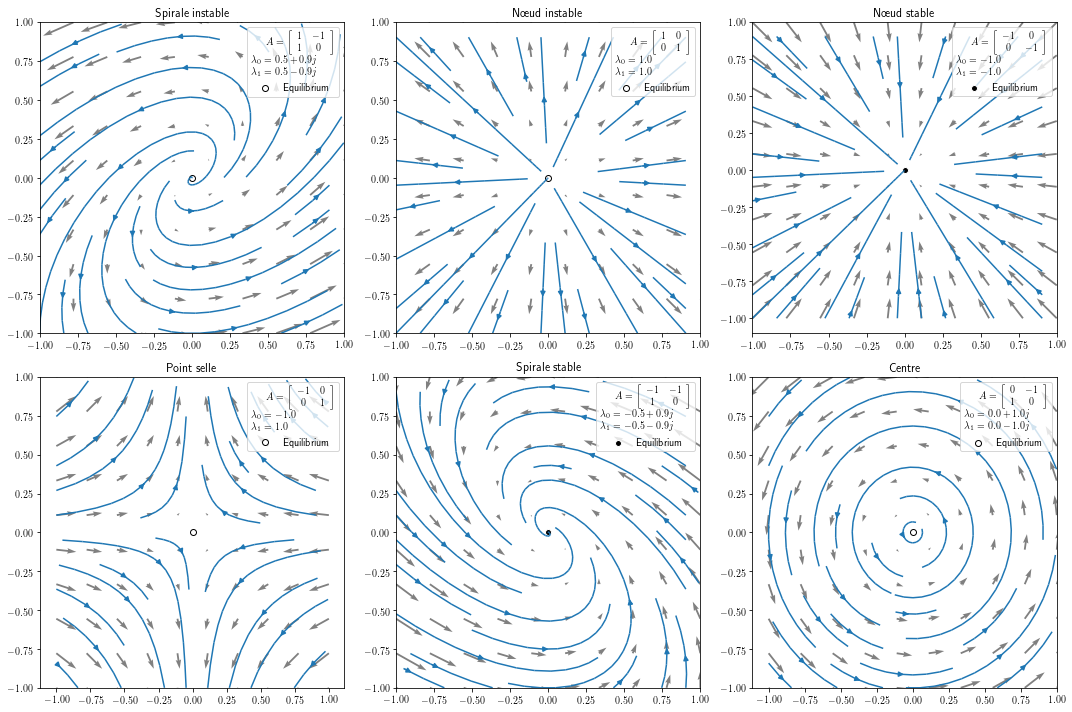

In [27]:
equilibria = {'Nœud instable': np.array([[1,0],[0,1]]),
              'Nœud stable': np.array([[-1,0],[0,-1]]),
              'Point selle': np.array([[-1,0],[0,1]]),
              'Centre': np.array([[0,-1],[1,0]]),
              'Spirale stable': np.array([[-1,-1],[1,0]]),
              'Spirale instable': np.array([[1,-1],[1,0]]),
             }
plt.rc('text', usetex=True)
fig, axes = plt.subplots(2,3,figsize=(15,10))
for ax,(k,A) in zip(axes.flat, equilibria.items()):   
    
    #### Trace le flot en 2D ####  
    
    # np.meshgrid permet de 
    X,Y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
    
    # np.vectorize permet de donner à une fonction quelquonque (ici le lambda)
    # des capacités de broadcasting (application à tous les éléments).
    # Par défaut vectorize attend une fonction qui prend des scalaires et retourne des scalaires.
    # Si ce n'est pas le cas il faut préciser la signature. Ici la fonction prend deux scalaires "(),()" et
    # retourne un array de taille 2 "->(2)"
    f = np.vectorize(lambda x,y: A@[x,y], signature='(),()->(2)')
    U = f(X,Y)    
    ax.quiver(X, Y, U[:,:,0], U[:,:,1], color='grey')
    ax.streamplot(X, Y, U[:,:,0], U[:,:,1], density=0.5)
    ### Flot tracé ####
    
    # Calcule les valeurs propres et les vecteurs propres de A.
    valp, vecp = np.linalg.eig(A)

    # Teste la stabilité de l'équilibre.
    stable = all(np.real(valp)<0)

    # Représente l'équilibre.
    ax.scatter(0, 0, 
               color='k' if stable else 'w',
               edgecolor = 'k' if not stable else 'w',
               label='Equilibrium')
    
    # Légende en latex. 
    # Nécessite d'avoir plt.rc('text', usetex=True)
    tex =  (r'$A = \left [ \begin{array}{cc}'
            + r"{0[0][0]:2} & {0[0][1]:2} \\ {0[1][0]:2} & {0[1][1]:2}".format(A) 
            + r'  \end{array} \right ]\\'
            + r'\lambda_0 = {0[0]:.1f} \\ \lambda_1 = {0[1]:.1f} $'.format(valp))
    ax.legend(title=tex, loc='upper right')
    ax.set(title=k)
plt.tight_layout()

In [28]:
# Trouvez les isoclines zero du modèle de Lotka-Volterra competitif
# Tracez le diagramme de phase pour les trois jeux de paramètres.
# Utilisez: plt.plot, plt.scatter, plt.streamplot, 
# En déduire les conditions de coexistance de deux espèces

# Modèle proie prédateur

- La cinétique est gouvernée par la **loi d'action de masse** (on imagine des individus bien mélangés, pas de saturation de la croissance ou de la prédation). 
- Les proies se reproduisent a un taux constant *per capita*: $b \; \text{proies}\times \text{secondes}^{-1}\times \text{proies}^{-1}$
- Les prédateurs meurent a un taux constant *per capita*: $d \; \text{prédateurs}\times \text{secondes}^{-1}\times \text{prédateurs}^{-1}$
- Les prédateurs ont besoin de se nourir pour pouvoir se reproduire. Les prédateurs font une prise de proie au taux : $a  \; \text{prédateur}\times \text{secondes}^{-1}$ et se reproduisent à un taux $c \; \text{proies}\times \text{secondes}^{-1}$. 

Ces hypothèses nous permettent de définir un **système dynamique**:

$$(S) = \begin{cases} 
\frac{dN}{dt} = bN - aNP \\
\frac{dP}{dt} = cNP - dP \\
\end{cases}$$

- La **trajectoire** du système est la suite $(N_t,P_t)_{t\in \mathbb R}$ qui désigne le nombre d'individus proies $N$ et prédateurs $P$ aux temps $t$ 

- Les **variables** d'état de ce modèle sont le temps, la population de proie et la population de prédateurs.

- Les **paramètres** de ce modèle sont les taux $(a,b,c,d)$.

In [31]:
# Montrez comment ce modèle est équivalent au précédent avec des paramètres r, a bien choisis. 
# Simulez ce modèle, tracez ses trajectoire comme des séries temporelles,
# puis comme des courbes paramétrées dans l'espace d'état
# Ajoutez les équilibres, les isoclines et le flot à l'espace d'état pour former le diagramme de phase.

params = [{"a":.01, "b":.02, "c":.01, "d":.02}, 
          {"a":.01, "b":.01, "c":.01, "d":.06}]
initial_conditions = [[3.6,2.1], [1.8,4]]
temps = np.linspace(0,1000,1500) 

# Une variante du modèle proie-prédateur
Le modèle que nous avons utilisé suppose que la croissance des proies est malthusienne. Que-se passe t-il si on relaxe cette hypothèse ?

Étudiez le modèle suivant:

\begin{equation}
(S) = \begin{cases}
\frac{dN}{dt} = bN(1-\frac{N}{K}) - aNP \\
\frac{dP}{dt} = cNP - dP \\
\end{cases}
\end{equation}

In [35]:
# Que signifie le nouveau paramètre ? Comment définir les paramètres r,k ? 
# Simulez-en quelques trajectoires. Quelle différences observez-vous ?
# Dessinez le diagramme de phase. Où sont les isoclines-zéro ? Où sont les équilibres ? Quelle est leur nature ?
# Faites varier c. Qu'observez vous ? Faites un diagramme de bifurcation. 

params = [{"a":.01, "b":.02, "c":.01, "d":.02, "K":10}, 
          {"a":.01, "b":.02, "c":.02, "d":.02, "K":10}]
initial_conditions = [[1,1], 
                      [1.8,4]]
temps = np.linspace(0,3000,1500) 